In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

In [14]:
objPoints = []
imgPoints = []

objp = np.zeros((6*9,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

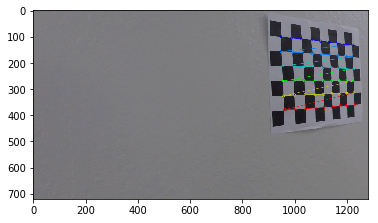

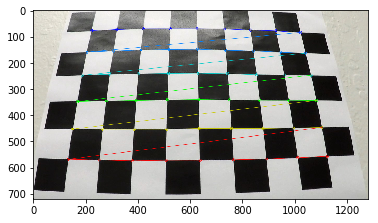

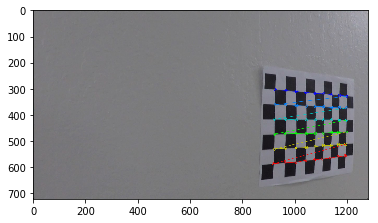

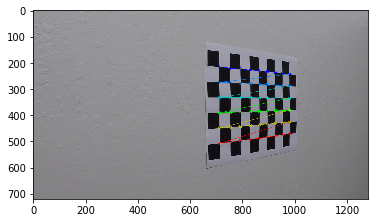

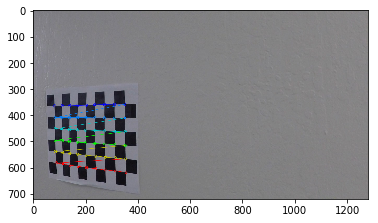

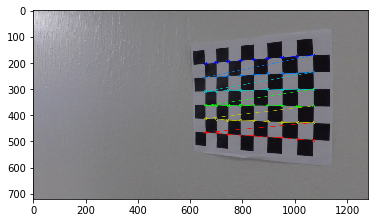

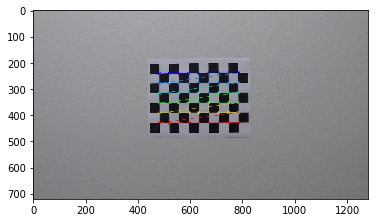

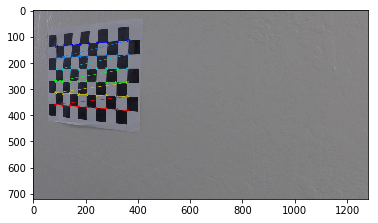

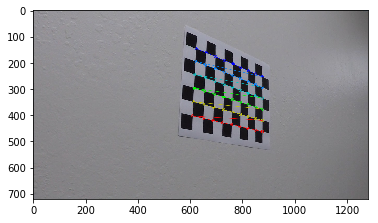

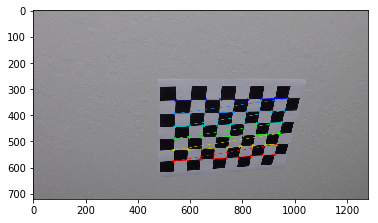

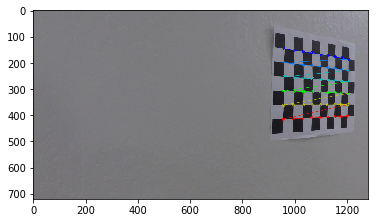

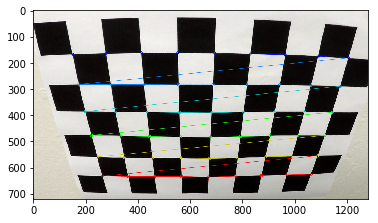

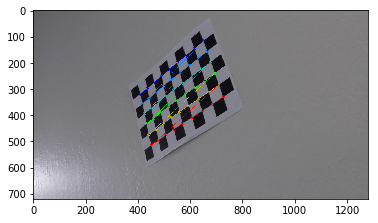

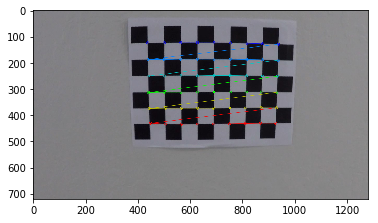

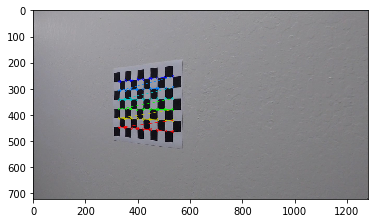

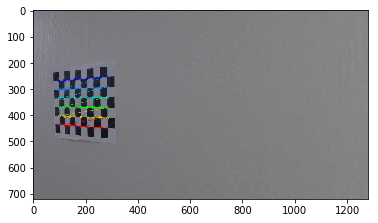

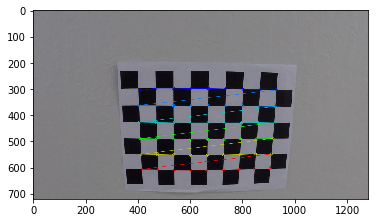

In [15]:
for img_path in glob.glob("./camera_cal/*.jpg"):
    img = mpimg.imread(img_path)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret,corners = cv2.findChessboardCorners(gray,(9,6),None)
    if ret:
        plt.figure()
        img = cv2.drawChessboardCorners(img,(9,6),corners,ret)
        objPoints.append(objp)
        imgPoints.append(corners)
        plt.imshow(img)

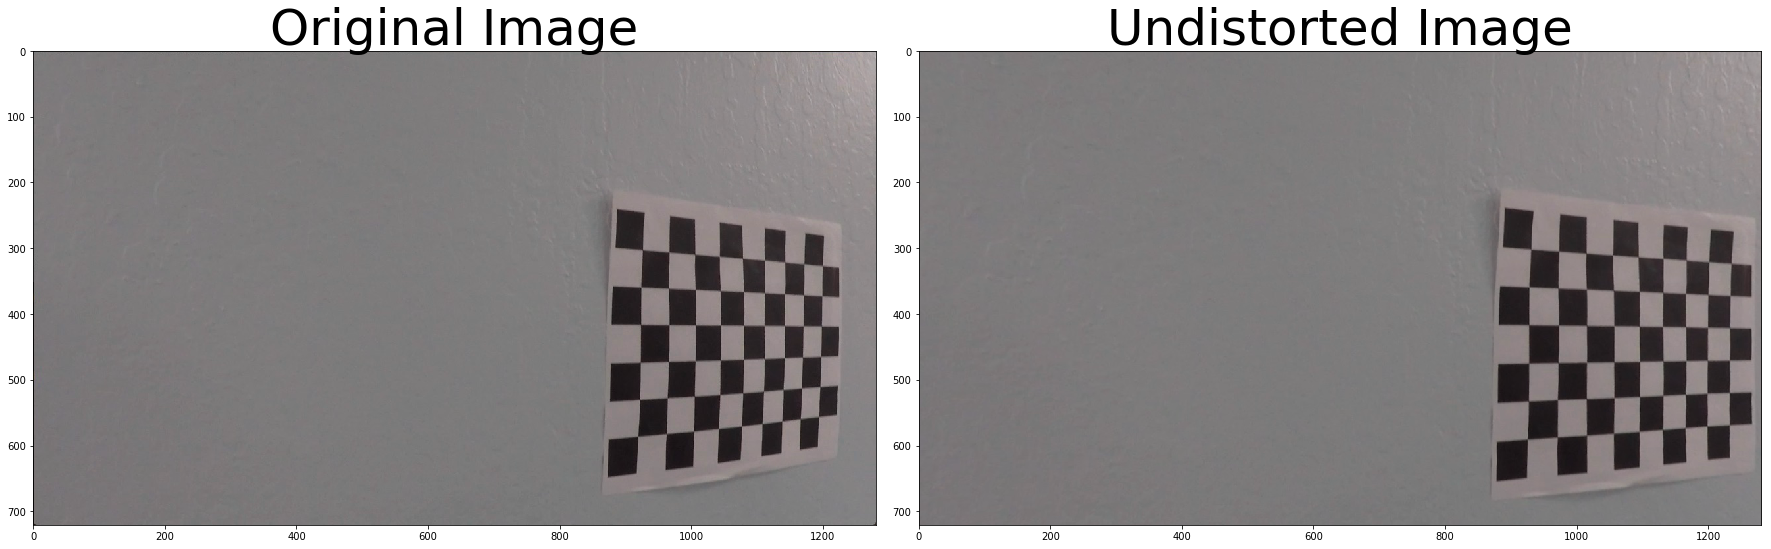

In [16]:
for img_name in glob.glob("./camera_cal/calibration15.jpg"):
    img = cv2.imread(img_name)
    ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objPoints,imgPoints,img.shape[1::-1],None,None)
    undst = cv2.undistort(img,mtx,dist,None,mtx)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=50)
    ax2.imshow(undst)
    ax2.set_title('Undistorted Image', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [17]:
import pickle

In [20]:
with open('objPoints','wb') as f:
    pickle.dump(objPoints,f)
with open('imgPoints','wb') as f:
    pickle.dump(imgPoints,f)